<a href="https://colab.research.google.com/github/polo-music/EDA-diamonds-R/blob/main/EDA_w_R_diamonds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory data analysis with a diamond dataset

---

<img src="https://yourdiamondguru.com/wp-content/uploads/2018/09/GIA-Cut-Scale.png" align="center">

---

It's been a long time since I did some EDA with R. Now I am re descovering the language with the use of the package Tidyverse, which is not far from addictive. It makes easier the manipulation and cleaning of information and I want to take a look at it in depth doing some exploratory data analysis.

There are a lot of built-in datasets with R itself, after doing a little bit of exploration with the data() method, I found the diamon dataset that has different data parameters. Let's do some exploration data analysis and cleaning if necessary.

## Questions

The first part in every EDA is to make sure which questions do we want to answer. The questions need to be as clear and as precise as possible in order to avoid getting of the analysis path. Of course, if we're asking a question to be responded (not quantitative) we'll have to first draw an initial hypothesis to try to refuse it.

First we'll have to explore some initial insights of the data:
*  Distribution of prices
*  Average volume
*  Volum diference between cuts

And then start asking questions:
*  Is there some cut more expensive than others?
> Hypothesis: Yes, the better the cut quality, the more expensive the diamond.
*  Which is the most common type of diamond?
> Check the different ammounts of diamonds to see if there is more of one type than others.
*  Which is the average price of all types of cuts?
*  Which is the average price of all the different types of diamonds?

At that point, we have a lot of questions worth answering! We can take a first look at the dataset with the gimpse() method built in the Tidyverse library.

In [1]:
library(tidyverse) # Load the Tidyverse library
library(ggplot2) # Load the GGPlot2 library for visualization
glimpse(diamonds) # Initial exploration of the data

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Rows: 53,940
Columns: 10
$ carat   <dbl> 0.23, 0.21, 0.23, 0.29, 0.31, 0.24, 0.24, 0.26, 0.22, 0.23, 0.…
$ cut     <ord> Ideal, Premium, Good, Premium, Good, Very Good, Very Good, Ver…
$ color   <ord> E, E, E, I, J, J, I, H, E, H, J, J, F, J, E, E, I, J, J, J, I,…
$ clarity <ord> SI2, SI1, VS1, VS2, SI2, VVS2, VVS1, SI1, VS2, VS1, SI1, VS1, …
$ depth   <dbl> 61.5, 59.8, 56.9, 62.4, 63.3, 62.8, 62.3, 61.9, 65.1, 59.4, 64…
$ table   <dbl> 55, 61, 65, 58, 58, 57, 57, 55, 61, 61, 55, 56, 61, 54, 62, 58…
$ price   <int> 326, 326, 327, 334, 335, 336, 336, 337, 337, 338, 339, 340, 34…
$ x       <dbl> 3.95, 3.89, 4.05, 4.20, 4.34, 3.94, 3.95, 4.07, 3.87, 4.00, 4.…
$ y       <dbl> 3.98, 3.84, 4.07, 4.23, 4.35, 3.96, 3.98, 4.11, 3.78, 4.05, 4.…
$ z       <dbl> 2.43, 2.31, 2.31, 2.63, 2.75, 2.48, 2.47, 2.53, 2.49, 2.39, 2.…


Great. We can see that it is a very populated dataset, which is good. The method glimpse() give us a glimpse (ba dum tss) of what the dataset looks like, the relationship it has and the type of variable each relationship is. 

The first think I can notice right out of the box after many many EDAs is that I have no idea about diamonds. Before starting an EDA with some dataset that is outside of your knowladge or field, is highly recommended to try to go a little bit deeper before actually start to coding to better focus and understend what the data is really telling you.

> Quick Google search to get these relations in place

*  Carat: Tiffany & Co is telling me that, for my surprise, carat is a weight measurement for diamonds, and **1 carat = 0.2 g**.
*  Cut: A diamond cut is a style or design guide used when shaping a diamond for polishing such as the brilliant cut. Cut does not refer to shape (pear, oval), but the symmetry, proportioning and polish of a diamond. As easy as that. We can see that is an ordered factor type of variable. Good.
*  Color: Diamonds occur in a variety of colors—steel gray, white, blue, yellow, orange, red, green, pink to purple, brown, and black. Colored diamonds contain interstitial impurities or structural defects that cause the coloration; pure diamonds are perfectly transparent and colorless. Yup, color.
*  Clarity: Diamond Clarity Refers to the Absence of Inclusions and Blemishes. Goes from flawless (FL) to included (I). We can check later the table if necessary, but I find important to at least understand the concept.
*  Depth: Diamond depth is a crucial factor of a diamond's cut. The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface).
*  Table: A diamond's table is the facet which can be seen when the stone is viewed face up. It is the largest facet on a diamond and plays a vital role in its brilliance and light performance.
*  Price: Google not necessary this time.
*  X, Y and Z: Not necessary, we assume that is their length in every dimension.

Good. Now that we know more or less what we're talking about, let's explore our data. 

Before starting answering the questions we made, first we have to check if the dataset is actually clean or it has to be cleaned.

In [2]:
colSums(is.na(diamonds)) # Quick check of na
unique(diamonds$cut)
unique(diamonds$clarity)
unique(diamonds$color)

carat     cut   color clarity   depth   table   price       x       y       z 
      0       0       0       0       0       0       0       0       0       0

[1] Ideal     Premium   Good      Very Good Fair     
Levels: Fair < Good < Very Good < Premium < Ideal

[1] SI2  SI1  VS1  VS2  VVS2 VVS1 I1   IF  
Levels: I1 < SI2 < SI1 < VS2 < VS1 < VVS2 < VVS1 < IF

[1] E I J H F G D
Levels: D < E < F < G < H < I < J

---

## Distribution of prices
First we'll start with the distribution of the prices for the diamonds and plot some visualization.

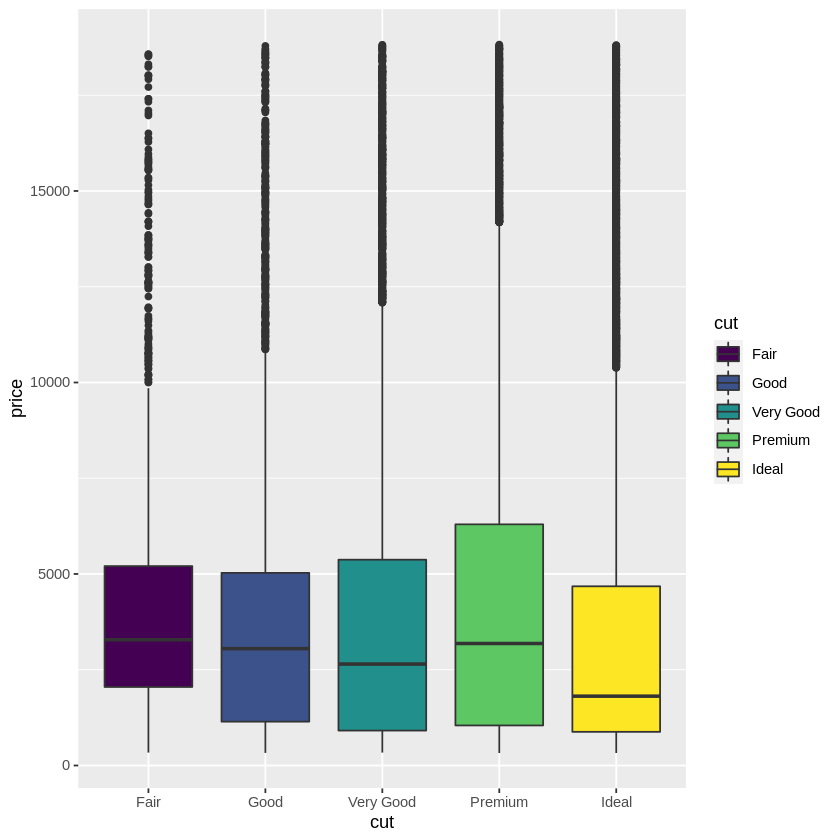

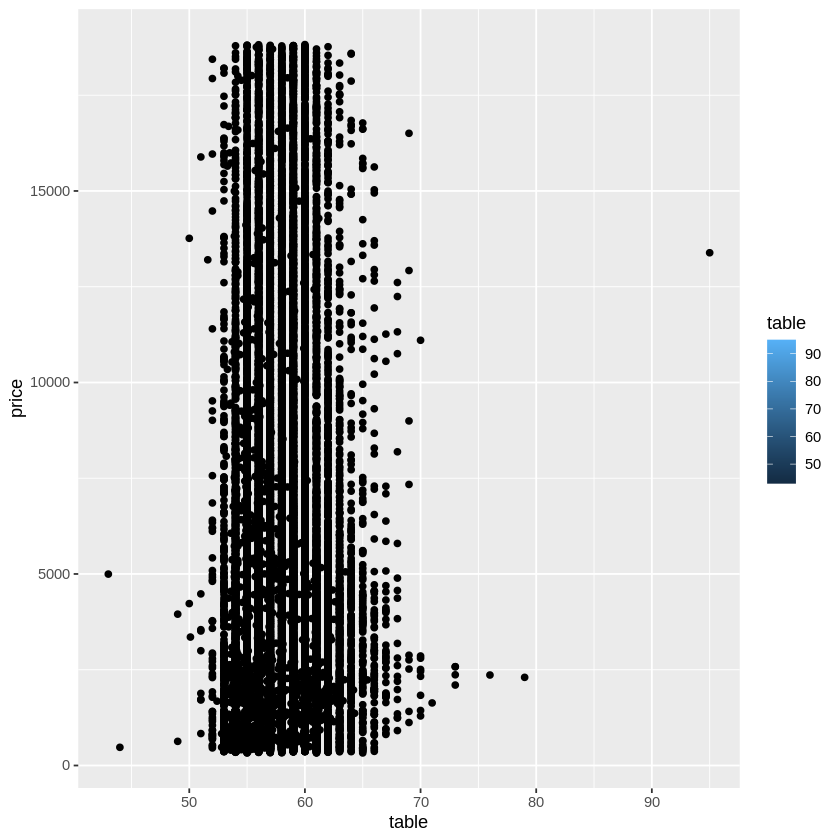

In [3]:
diamonds %>%
  ggplot(aes(x=cut, y=price, fill=cut)) +
  geom_boxplot()

diamonds %>%
  ggplot(aes(x=table, y=price, fill=table)) +
  geom_point()

---

## Price action



`geom_smooth()` using formula 'y ~ s(x, bs = "cs")'



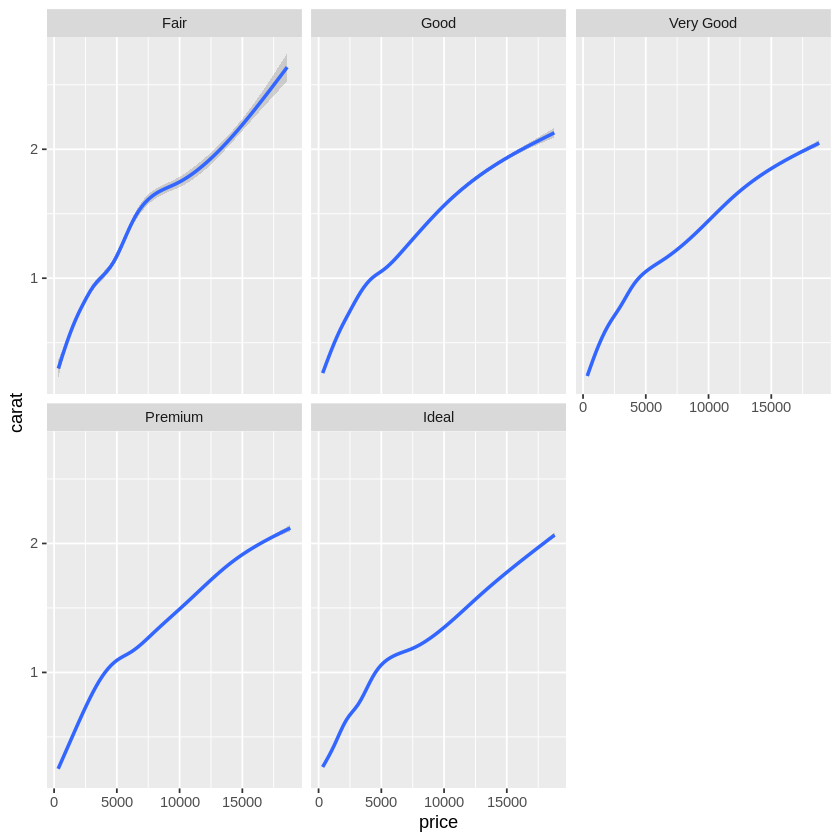

In [4]:
ggplot(data = diamonds, mapping = aes(x = price, y = carat)) +
  geom_smooth(method = 'gam') +
  facet_wrap(~ cut, nrow = 2)

# Average volume & volume diference between cuts

First of all, we can create a new dataframe with a column 'volume', that's just the product between x, y a z size fo the diamond. Then, we'll get the average volume of all the diamonds. And we can plot it out depending on the carat and the cut.

In [23]:
volume_df <- diamonds %>%
  select(x, y, z, cut, price)

volume_df <- volume_df %>%
  mutate('volume' = x * y * z) %>%
  filter(volume < 1000)

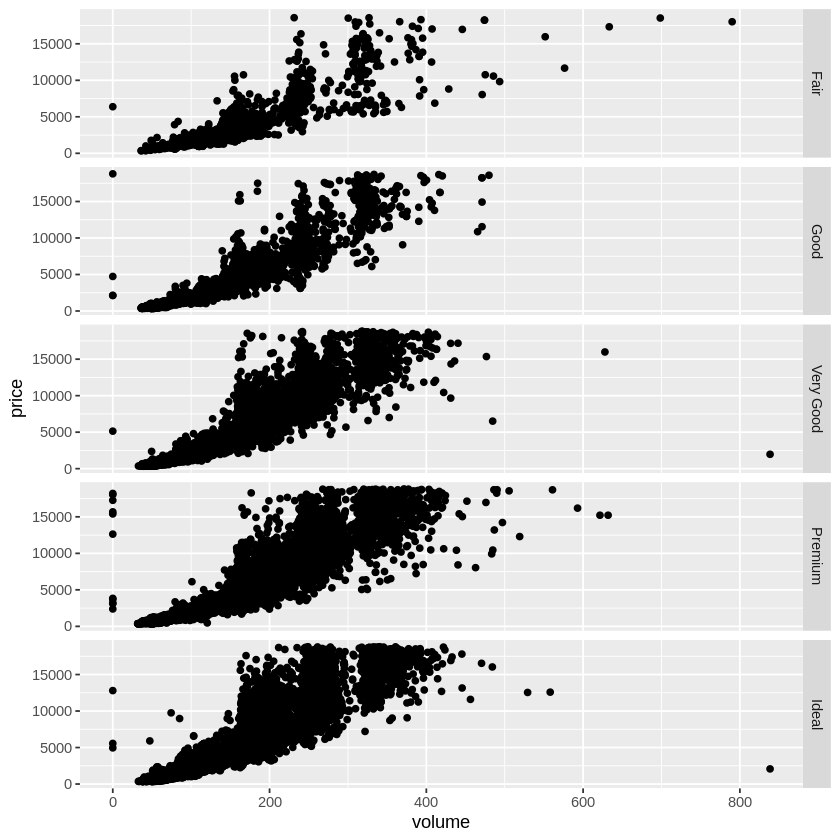

In [25]:
ggplot(data = volume_df, mapping = aes(x = volume, y = price)) +
  geom_point() +
  facet_grid(rows = vars(cut))